In [12]:
import beautifultools as bt
import pandas as pd
import wordcloud as wc
import pickle
import qgrid
import os.path

import importlib
importlib.reload(bt)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

import scipy

# Scraping for Scouting
## An intergalactic guide on how to leverage prospect web-page information

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#An-intergalactic-guide-on-how-to-leverage-prospect-web-page-information" data-toc-modified-id="An-intergalactic-guide-on-how-to-leverage-prospect-web-page-information-1">An intergalactic guide on how to leverage prospect web-page information</a></span></li><li><span><a href="#An-unusual-benchmark:-La-Divina-Commedia" data-toc-modified-id="An-unusual-benchmark:-La-Divina-Commedia-2">An unusual benchmark: La Divina Commedia</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-3">Modelling</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Feature-selection" data-toc-modified-id="Step-1:-Feature-selection-3.1">Step 1: Feature selection</a></span></li><li><span><a href="#Step-2:-Topic-modelling" data-toc-modified-id="Step-2:-Topic-modelling-3.2">Step 2: Topic modelling</a></span></li><li><span><a href="#Step-3:-Scoring-on-webpage" data-toc-modified-id="Step-3:-Scoring-on-webpage-3.3">Step 3: Scoring on webpage</a></span></li></ul></li><li><span><a href="#A-practical-application" data-toc-modified-id="A-practical-application-4">A practical application</a></span></li><li><span><a href="#Objective" data-toc-modified-id="Objective-5">Objective</a></span></li><li><span><a href="#Data-gathering-process" data-toc-modified-id="Data-gathering-process-6">Data gathering process</a></span></li><li><span><a href="#Exploratory-analysis" data-toc-modified-id="Exploratory-analysis-7">Exploratory analysis</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-keywords-by-customer-and-prospect" data-toc-modified-id="Distribution-of-keywords-by-customer-and-prospect-7.1">Distribution of keywords by customer and prospect</a></span></li><li><span><a href="#A-glimpse-on-the-distribution" data-toc-modified-id="A-glimpse-on-the-distribution-7.2">A glimpse on the distribution</a></span></li><li><span><a href="#Let's-normalize:-stemming" data-toc-modified-id="Let's-normalize:-stemming-7.3">Let's normalize: stemming</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-8">Modelling</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Feature-selection" data-toc-modified-id="Step-1:-Feature-selection-8.1">Step 1: Feature selection</a></span></li><li><span><a href="#Step-2:-Topic-modelling" data-toc-modified-id="Step-2:-Topic-modelling-8.2">Step 2: Topic modelling</a></span></li><li><span><a href="#Step-3:-Scoring-on-webpage" data-toc-modified-id="Step-3:-Scoring-on-webpage-8.3">Step 3: Scoring on webpage</a></span></li></ul></li><li><span><a href="#Applying-the-model" data-toc-modified-id="Applying-the-model-9">Applying the model</a></span><ul class="toc-item"><li><span><a href="#Training-test-split" data-toc-modified-id="Training-test-split-9.1">Training-test split</a></span></li><li><span><a href="#Crossvalidating-parameters" data-toc-modified-id="Crossvalidating-parameters-9.2">Crossvalidating parameters</a></span></li><li><span><a href="#Out-of-sample-model-performance" data-toc-modified-id="Out-of-sample-model-performance-9.3">Out of sample model performance</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10">Conclusion</a></span></li></ul></div>

## An unusual benchmark: La Divina Commedia

In [3]:
df = bt.testData.dante(path = "data/dante.txt")

In [4]:
qgrid.show_grid(df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [5]:
infernoKeywords = " ".join(df.loc["inferno"]["content"].tolist())
purgatorioKeywords = " ".join(df.loc["purgatorio"]["content"].tolist())
paradisoKeywords = " ".join(df.loc["paradiso"]["content"].tolist())

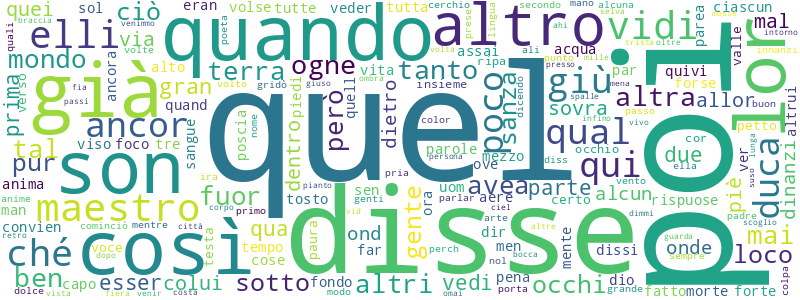

In [6]:
# Inferno wordcloud
wc.WordCloud(background_color="white",
             repeat=False,
             collocations=False,
             width=800,
             height=300).generate(infernoKeywords).to_image()

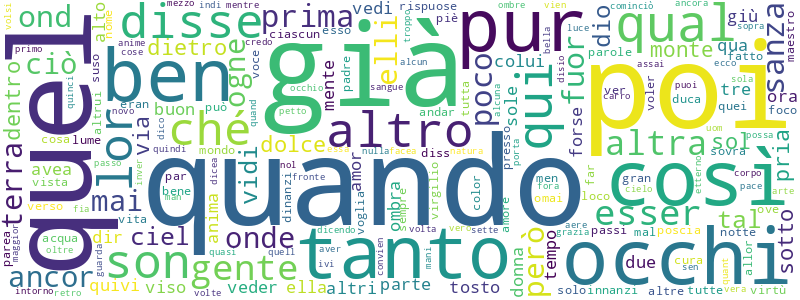

In [7]:
# Purgatorio wordcloud
wc.WordCloud(background_color="white",
             repeat=False,
             collocations=False,
             width=800,
             height=300).generate(purgatorioKeywords).to_image()

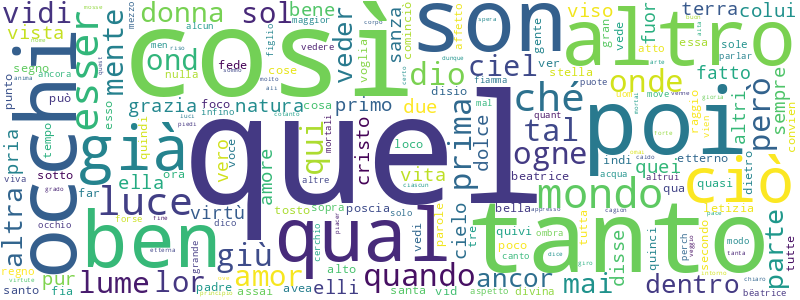

In [8]:
# Paradiso wordcloud
wc.WordCloud(background_color="white",
             repeat=False,
             collocations=False,
             width=800,
             height=300).generate(paradisoKeywords).to_image()

## Modelling

In [10]:
df = df.reset_index()
df = df.drop(["canto"],axis=1)
df["label"] = (df["label"] == "inferno").apply(lambda x: float(x))

In [11]:
qgrid.show_grid(df)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [15]:
df_train, df_test = train_test_split(df, 
                                     test_size=0.1, 
                                     random_state=42)

In [17]:
res = bt.SSESTM(alpha_minus=0.5, 
                alpha_plus=0.5,
                kappa=3).fit(X = df_train["content"], 
                              y = df_train["label"])

### Step 1: Feature selection

In [18]:
qgrid.show_grid(res.marginal_screening)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Step 2: Topic modelling

In [19]:
test = pd.DataFrame({"S": res.marginal_screening["term"], 
                     "Op": res.topic_coefficients[:,0], 
                     "Om": res.topic_coefficients[:,1]})
qgrid.show_grid(test)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Step 3: Scoring on webpage

In [20]:
pred = res.predict(df_test["content"])
pred

array([0.41188856, 0.51734493, 0.30883055, 0.5573929 , 0.56501028,
       0.46820269, 0.71021942, 0.19549045, 0.48621668, 0.58461872])

In [29]:
scipy.stats.distributions.uniform.rvs(loc=0.5, scale=0.5,size = 10)

array([0.74226793, 0.55094533, 0.92825481, 0.74687417, 0.96305954,
       0.67369258, 0.91335279, 0.60065583, 0.88428504, 0.77187207])

In [33]:
distributions = dict(alpha_plus = scipy.stats.distributions.uniform(loc=0.5, scale=0.5),
                     alpha_minus = scipy.stats.distributions.uniform(loc=0.0, scale=0.5))

In [34]:
distributions

{'alpha_plus': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fd8ea9a8290>,
 'alpha_minus': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fd8ea9fb7d0>}

In [24]:
scipy.stats.distributions.uniform?

In [ ]:
bestModel = RandomizedSearchCV(bt.SSESTM(), 
                   distributions, 
                   random_state = 1994,
                   n_jobs = -1,
                   n_iter = 5,
                   cv = 5,
                   scoring= "neg_mean_squared_error").fit(X = df_train["content"], y = df_train["label"])

In [ ]:
bestModel.best_estimator_

In [ ]:
parameters = {"kappa": (4, 16, 32),
              "alpha_plus": (0.5, 0.6, 0.7),
              "alpha_plus": (0.5, 0.4, 0.3),
              "l" : (0,10,100)}

clf = GridSearchCV(bt.SSESTM(), parameters, scoring= "neg_mean_squared_error", cv = 5, iid = True)
clf.fit(X = df_train["content"], y = df_train["label"])

In [ ]:
df_test = df_test.copy()
df_test["pred"] = clf.best_estimator_.predict(df_test["content"])

In [ ]:
clf.best_estimator_.predict(df_test["content"])

In [ ]:
df_test["content"] = "tal era io a quella vista nova veder voleva come si convenne selva selvaggia oscura buio terra maestro"

In [ ]:
clf.best_estimator_

In [ ]:
qgrid.show_grid(df_test)

## A practical application
## Objective
Use the information contained in the home pages of Siemens customers and potential ones to train an algorithm that outputs a sentiment $p = [0,1]$ on new potential prospects home pages.

## Data gathering process

In [ ]:
# Save/load the file based on its existence
if os.path.isfile("data/webpageTokens.pickle"):
    print("Loading file")
    with open("data/webpageTokens.pickle", "rb") as fp:  # UnPickling
        df = pickle.load(fp)

else:
    # Parse data from spreadsheets
    prospect = pd.read_excel("output/Prospect_Ranking_NoCompetitor.xlsx")

    client = pd.read_excel("data/Master TEMPLATE_DF-PD_2019_8_MARCO.xlsx",
                           sheet_name="Master Template")

    # Evaluate 2018-2017-2016 mean orders
    client["Orders Mean"] = client[[
        "Orders 18 DF_PD (cubo vs P.IVA) ",
        "Orders 17 DF_PD (cubo vs P.IVA)",
        "Orders 16 DF_PD (cubo vs P.IVA)",
    ]].mean(axis=1)
    # Reject rows if mean is 0 or below 0
    client = client[client["Orders Mean"] > 0]

    col1 = [0 for i in range(0, len(prospect["Sito Web"]))]
    col2 = list(prospect["Sito Web"])
    col3 = [0 for i in range(0, len(prospect["Sito Web"]))]

    col1.extend([1 for i in range(0, len(client["Sito Web"]))])
    col2.extend(list(client["Sito Web"]))
    col3.extend(list(client["Orders Mean"]))

    # Construct the dataframe and drop the NAs (no webpage exists)
    df = pd.DataFrame(({
        "Client": col1,
        "WebPage": col2,
        "Keywords": "",
        "Orders": col3
    }))
    df = df.dropna()

    # Check whether url exists and then get the data from the HTML file
    df = df.copy()
    df.loc[:, ("WebPage")] = df["WebPage"].apply(bt.urlize_string,
                                                 warning=False,
                                                 verify=False)
    df = df.dropna()
    df.loc[:, ("Keywords")] = df["WebPage"].apply(bt.webpage_text_tokenizer,
                                                  body=False,
                                                  verify=False)

    print("Saving file")
    with open("data/webpageTokens.pickle", "wb") as fp:  # Pickling
        pickle.dump(df, fp)

In [ ]:
# Get rid of duplicated keywords
df.loc[:, ("Keywords")] = df["Keywords"].apply(bt.drop_duplicates)

# Get rid of gone or forbidden pages
df = df[df.loc[:, ("Keywords")] != "gone"]
df = df[df.loc[:, ("Keywords")] != "forbidden"]
df = df[df.loc[:, ("Keywords")] != "home"]

In [ ]:
df = df[df["Keywords"].apply(len) > 60]

In [ ]:
# A glimpse
qgrid.show_grid(df.head(10))

## Exploratory analysis 
### Distribution of keywords by customer and prospect

In [ ]:
clientKeywords = " ".join(df["Keywords"][df["Client"] == 1].tolist())
prospectKeywords = " ".join(df["Keywords"][df["Client"] == 0].tolist())

In [ ]:
# Clients wordcloud
wc.WordCloud(background_color="white",
             repeat=False,
             collocations=False,
             width=800,
             height=300).generate(clientKeywords).to_image()

In [ ]:
# Prospect wordcloud
wc.WordCloud(background_color="white",
             repeat=False,
             collocations=False,
             width=800,
             height=300).generate(prospectKeywords).to_image()

### A glimpse on the distribution

In [ ]:
bt.plot_word_frequencies(prospectKeywords, title="Prospect word freq")

In [ ]:
bt.plot_word_frequencies(clientKeywords, title="Client word freq")

### Let's normalize: stemming

In [ ]:
keywordsNoStem = " ".join(df["Keywords"].tolist())
keywordsNoStem = bt.drop_duplicates(keywordsNoStem).split(" ")
len(keywordsNoStem)

In [ ]:
keywordsStem = " ".join(df["Keywords"].tolist())
keywordsStem = bt.stem_words(keywordsStem)
keywordsStem = bt.drop_duplicates(keywordsStem).split(" ")
len(keywordsStem)

In [ ]:
df["Keywords"] = df["Keywords"].apply(bt.stem_words)

## Modelling

In [ ]:
import importlib
importlib.reload(bt)

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                     test_size=0.20, 
                                     random_state=42)

res = bt.SSESTM(alpha_minus=0.5, 
                alpha_plus=0.5,
                kappa=3).fit(X = df_train["Keywords"], 
                              y = df_train["Orders"])

### Step 1: Feature selection

In [ ]:
qgrid.show_grid(res.marginal_screening)

In [ ]:
res.marginal_screening.shape

### Step 2: Topic modelling

In [ ]:
test = pd.DataFrame({"S": res.marginal_screening["term"], 
                     "Op": res.topic_coefficients[:,0], 
                     "Om": res.topic_coefficients[:,1]})
qgrid.show_grid(test)

### Step 3: Scoring on webpage

In [ ]:
pred = res.predict(df_test["Keywords"])
pred

## Applying the model

### Training-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.30, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {"kappa": (4, 16, 32),
              "alpha_plus": (0.5, 0.6, 0.7),
              "alpha_plus": (0.5, 0.4, 0.3),
              "l" : (0,10,100)}

clf = GridSearchCV(bt.SSESTM(), parameters, scoring= "neg_mean_squared_error", cv = 5, iid = True)
clf.fit(X = df_train["Keywords"], y = df_train["Orders"])

In [ ]:
df_test = df_test.copy()
df_test["Pred"] = clf.best_estimator_.predict(df_test["Keywords"])

In [ ]:
qgrid.show_grid(df_test)

### Crossvalidating parameters

### Out of sample model performance 

## Conclusion

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LinearRegression(fit_intercept=True,normalize=False,copy_X=True).get_params()